In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")

In [2]:
close = pd.read_csv("close.csv", index_col="Date", parse_dates = ["Date"])
close

,AMC,BA,BTC-USD,GC=F,MSFT
Date,,,,,
2014-10-01,229.1000,124.6700,383.6150,1214.6000,45.9000
2014-10-02,232.0000,124.1700,375.0720,1214.2000,45.7600
2014-10-03,234.1000,126.3600,359.5120,1192.2000,46.0900
2014-10-04,NaN,NaN,328.8660,NaN,NaN
2014-10-05,NaN,NaN,320.5100,NaN,NaN
...,...,...,...,...,...
2024-02-15,4.8900,205.3300,51938.5547,2002.1000,406.5600
2024-02-16,4.8300,203.8900,52160.2031,2011.5000,404.0600
2024-02-17,NaN,NaN,51662.9961,NaN,NaN


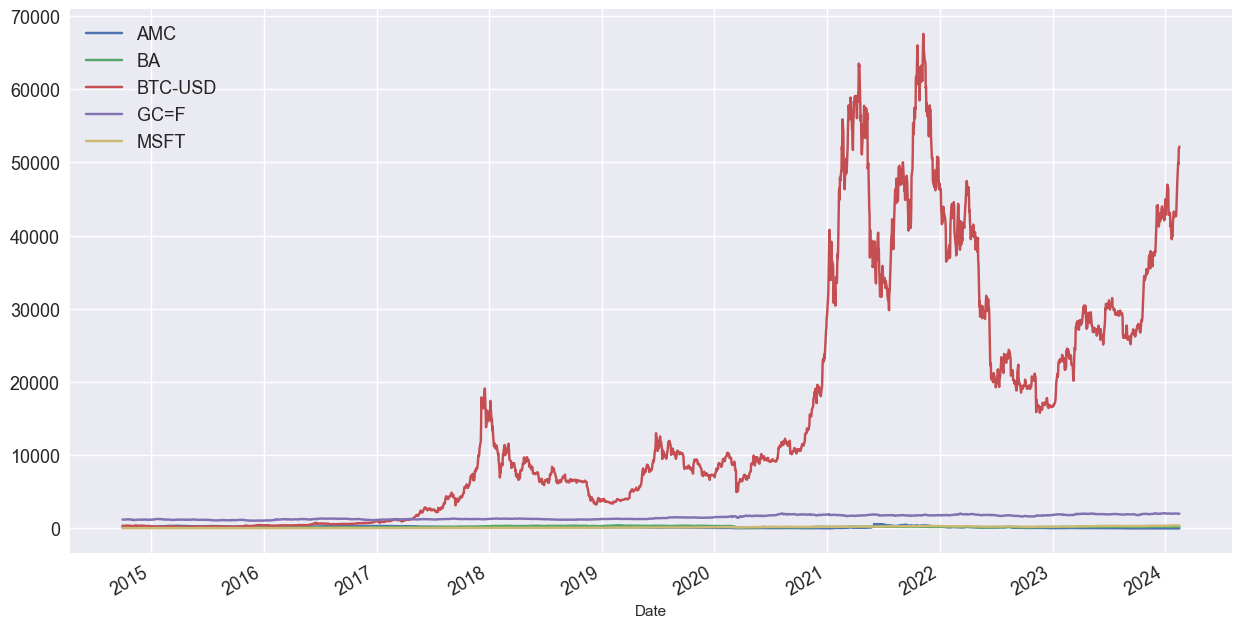

In [3]:
close.dropna().plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [4]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3429 entries, 2014-10-01 to 2024-02-19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMC      2361 non-null   float64
 1   BA       2361 non-null   float64
 2   BTC-USD  3429 non-null   float64
 3   GC=F     2360 non-null   float64
 4   MSFT     2361 non-null   float64
dtypes: float64(5)
memory usage: 160.7 KB


In [8]:
np.log(close/close.shift())

,AMC,BA,BTC-USD,GC=F,MSFT
Date,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN
2014-10-02,229.1000,124.6700,383.6150,1214.6000,45.9000
2014-10-03,232.0000,124.1700,375.0720,1214.2000,45.7600
2014-10-04,234.1000,126.3600,359.5120,1192.2000,46.0900
2014-10-05,NaN,NaN,328.8660,NaN,NaN
...,...,...,...,...,...
2024-02-15,4.8000,203.3800,51826.6953,1990.3000,409.4900
2024-02-16,4.8900,205.3300,51938.5547,2002.1000,406.5600
2024-02-17,4.8300,203.8900,52160.2031,2011.5000,404.0600


In [7]:
np.log(close/close.shift()).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3429 entries, 2014-10-01 to 2024-02-19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMC      1850 non-null   float64
 1   BA       1850 non-null   float64
 2   BTC-USD  3428 non-null   float64
 3   GC=F     1849 non-null   float64
 4   MSFT     1850 non-null   float64
dtypes: float64(5)
memory usage: 160.7 KB


In [9]:
returns = close.apply(lambda x : np.log(x.dropna() / x.dropna().shift()))
returns

,AMC,BA,BTC-USD,GC=F,MSFT
Date,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN
2014-10-02,0.0126,-0.0040,-0.0225,-0.0003,-0.0031
2014-10-03,0.0090,0.0175,-0.0424,-0.0183,0.0072
2014-10-04,NaN,NaN,-0.0891,NaN,NaN
2014-10-05,NaN,NaN,-0.0257,NaN,NaN
...,...,...,...,...,...
2024-02-15,0.0186,0.0095,0.0022,0.0059,-0.0072
2024-02-16,-0.0123,-0.0070,0.0043,0.0047,-0.0062
2024-02-17,NaN,NaN,-0.0096,NaN,NaN


In [10]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3429 entries, 2014-10-01 to 2024-02-19
Freq: D
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMC      2360 non-null   float64
 1   BA       2360 non-null   float64
 2   BTC-USD  3428 non-null   float64
 3   GC=F     2359 non-null   float64
 4   MSFT     2360 non-null   float64
dtypes: float64(5)
memory usage: 160.7 KB


In [11]:
returns.describe()

,AMC,BA,BTC-USD,GC=F,MSFT
count,2360.0000,2360.0000,3428.0000,2359.0000,2360.0000
mean,-0.0016,0.0002,0.0014,0.0002,0.0009
std,0.0682,0.0256,0.0371,0.0093,0.0174
min,-0.8355,-0.2724,-0.4647,-0.0511,-0.1595
25%,-0.0235,-0.0100,-0.0125,-0.0043,-0.0071
50%,-0.0017,0.0005,0.0014,0.0003,0.0008
75%,0.0180,0.0108,0.0169,0.0050,0.0099
max,1.3893,0.2177,0.2251,0.0578,0.1329


In [17]:
summary = returns.agg(["mean","std"]).T
summary

,mean,std
AMC,-0.0016,0.0682
BA,0.0002,0.0256
BTC-USD,0.0014,0.0371
GC=F,0.0002,0.0093
MSFT,0.0009,0.0174


In [23]:
summary.columns = ["Mean","Std"]
summary

,Mean,Std
AMC,-0.0016,0.0682
BA,0.0002,0.0256
BTC-USD,0.0014,0.0371
GC=F,0.0002,0.0093
MSFT,0.0009,0.0174


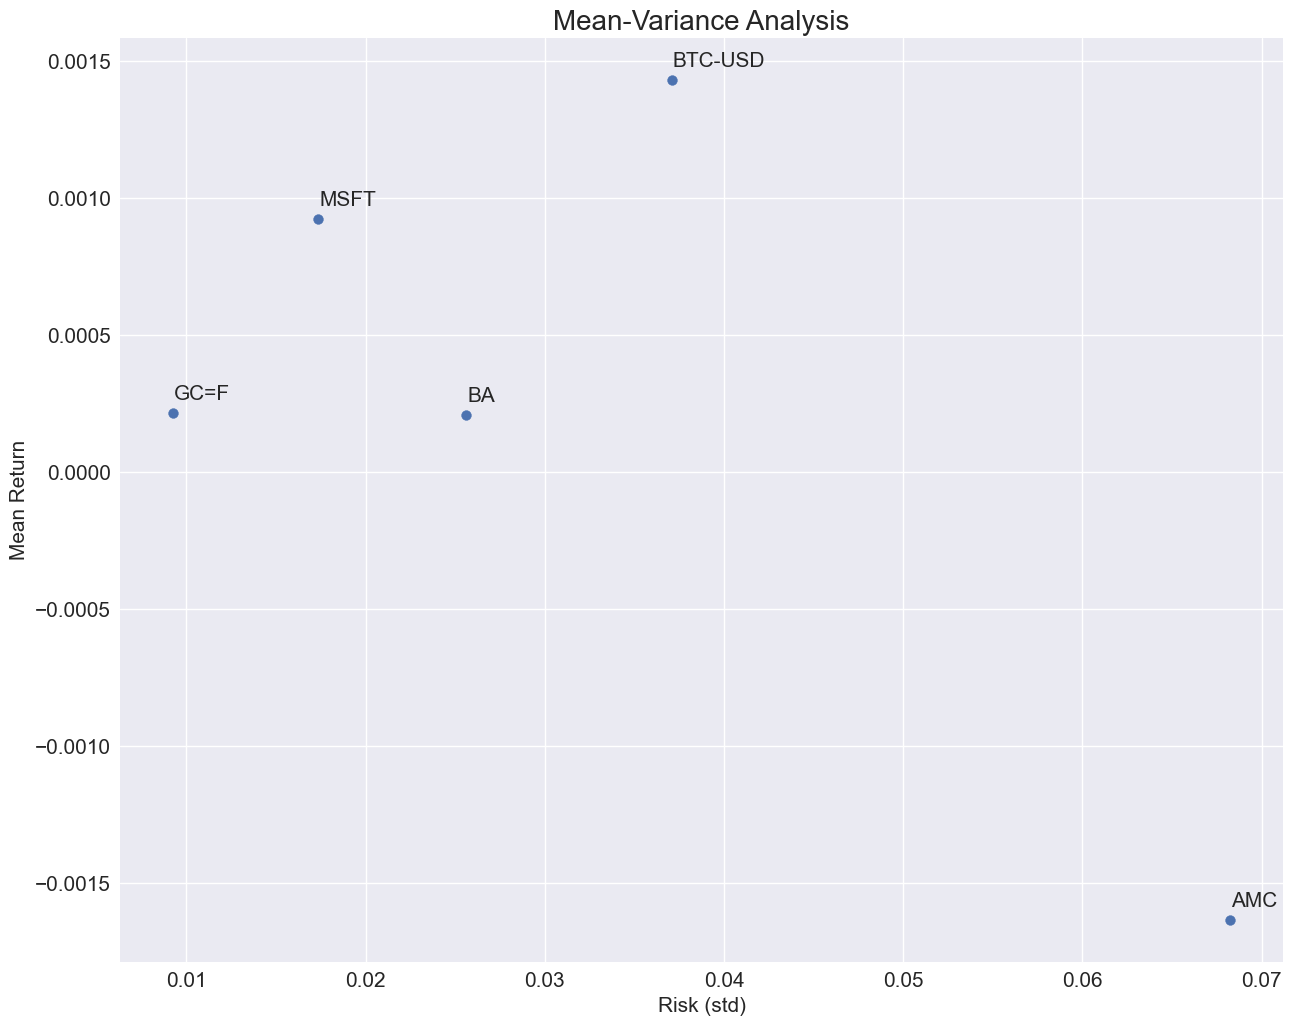

In [25]:
#x축에는 기준편차 Y축에는 평균으로 2차원표를만들어보자
#x축에는 기준편차 y축 평균을 놓인 산포도를 만들어낼 수 있음
#x축에 평균 분산 분석과 함께 위험성을, y축에는 평균 수익률과 함께 수익률이 보인다.
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

In [ ]:
# 이런식으로 평균분산 분석을 할  수 있지만 중대한 단점이 있다. 바로 금융수익이 정규분포를 따른다고 짐작한다는 것인데 거의 그럴일이 없다
